### Class 3

1. Hypothesis Tests
    * 1-sample
    * 2-sample
2. Permutation Tests


In [3]:
%run ./ourFunctions.py
%precision 2
cars = pd.read_csv('../data/Auto.csv')
np.mean(cars[cars["cylinders"]==4].mpg)

29.28

### One-sample Test

We have learned about the **bootstrap** as a slick way of resampling your data to obtain sampling distributions of various measures of interest, 
Without having to learn highly specific distributions (such as the $\chi^2$, Poisson, Binomial or F-distribution) the bootstrap enables us to 


1. get **confidence intervals**
2. perform **one-sample tests**
3. perform **two-sample tests**

Imagine the EPA requiring the average mpg for 4-cylinder cars to be at least $30$ and needs to decide -based on this sample only- whether the manufacturers need to implement some improvements.
In statistical jargon: can the EPA **reject the claim** that the **true mean** is at least 30 ?


**Tasks**
- Test $H_0: \mu \geq 30, H_A: \mu < 30$ for the mean mpg of 4-cylinder cars
    * using bootstrap replicates
    * via standard testing theory.
- Compute the corresponding **p-values**.

In [4]:
# birth weight data
bwt = pd.read_csv('../data/BirthWeights.csv', nrows=500)

bwt.head()

,Unnamed: 0,gender,dbirwt
0,1,male,2551
1,2,male,2778
2,3,female,2976
3,4,female,3345
4,5,female,3175


In [25]:
bwt.shape

(500, 3)

In [5]:
grouped = bwt["dbirwt"].groupby(bwt["gender"])
print(grouped.mean())

gender
female    3452.487705
male      3474.714844
Name: dbirwt, dtype: float64


### A two-sample bootstrap hypothesis test for difference of means

A one sample test compares a data set to one fixed number !

We now want to compare two sets of data, both of which are samples! In particular test the hypothesis that male and female babies have the same biological weight (but not necessarily the same distribution). 

$H_0: \mu_m = \mu_f, H_A: \mu_m \neq \mu_f$

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [6]:
# Compute mean of all weights
mean_weight = np.mean(bwt["dbirwt"])
w_m = bwt[bwt["gender"]=="male"].dbirwt
w_f = bwt[bwt["gender"]=="female"].dbirwt
empirical_diff_means = np.mean(w_m)-np.mean(w_f)

# Generate shifted arrays
weight_m_underNull = w_m - np.mean(w_m) + mean_weight
weight_f_underNull = w_f - np.mean(w_f) + mean_weight

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_m = draw_bs_reps(weight_m_underNull, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(weight_f_underNull, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.3734


### Permutation 2-sample test

Another way to compare 2 distributions is much more straightforward than the bootstrap.

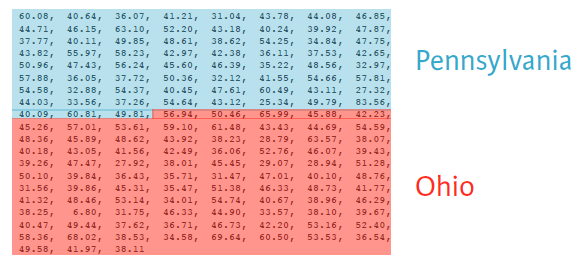

Let us first investigate the Titanic data:

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
PclassSurv = titanic.groupby(['pclass', 'survived'])
PclassSurv.size()

In [ ]:
pd.crosstab(titanic.pclass, titanic.survived,margins=True)

In [ ]:
WomenOnly = titanic[titanic["sex"]=="female"]
pd.crosstab(WomenOnly.pclass, WomenOnly.survived,margins=True)

Test the claim that the survival chances of women in 1st and 2nd class were pretty much the same.

1. Write down the Null hypothesis and test statistic
2. Write code that generates permutation samples from two data sets
3. Generate many **permutation replicates**

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2